# Fashion and Beauty Start-Up Supply Chain Analysis and Predictive Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, minmax_scale, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report
from sklearn.model_selection import KFold, train_test_split
import statsmodels.api as sm
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2024-01-12 18:03:39.175106: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_init= pd.read_csv('/Users/josephlim/Desktop/Data Science/Supply Chain/Fashion and Beauty/Data/supply_chain_data.csv')

In [3]:
df_init.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df_init.shape

(100, 24)

In [5]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
df_init.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [7]:
missing= df_init.isna().sum()
missing_values= missing[missing>0]

if not missing_values.empty:
    for column, item in mising_values.items():
        print(f"{item} missing in {colum}")
else:
    print("No missing value")

No missing value


In [8]:
if df_init.duplicated().any():
    print(f"There are as many as {df_init.duplicated().sum()} duplicate values in this data")
else: 
    print('No duplicate values')


No duplicate values


In [9]:
df_init.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


### Correlation Matrix
We'll consider anything over 0.7 strong correlation, anything in between 0.5-0.7 a moderate correlation, anything below 0.5-0.3 a weak correlation, and below 0.3 no correlation.

/var/folders/z9/t15ddpld70nc5qf41442lpr80000gn/T/ipykernel_4284/2287251797.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_SC.corr(), linewidths=0.1, cmap= 'YlGnBu', annot=True)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'Price'),
  Text(0, 1.5, 'Availability'),
  Text(0, 2.5, 'Number of products sold'),
  Text(0, 3.5, 'Revenue generated'),
  Text(0, 4.5, 'Stock levels'),
  Text(0, 5.5, 'Lead times'),
  Text(0, 6.5, 'Order quantities'),
  Text(0, 7.5, 'Shipping times'),
  Text(0, 8.5, 'Shipping costs'),
  Text(0, 9.5, 'Lead time'),
  Text(0, 10.5, 'Production volumes'),
  Text(0, 11.5, 'Manufacturing lead time'),
  Text(0, 12.5, 'Manufacturing costs'),
  Text(0, 13.5, 'Defect rates'),
  Text(0, 14.5, 'Costs')])

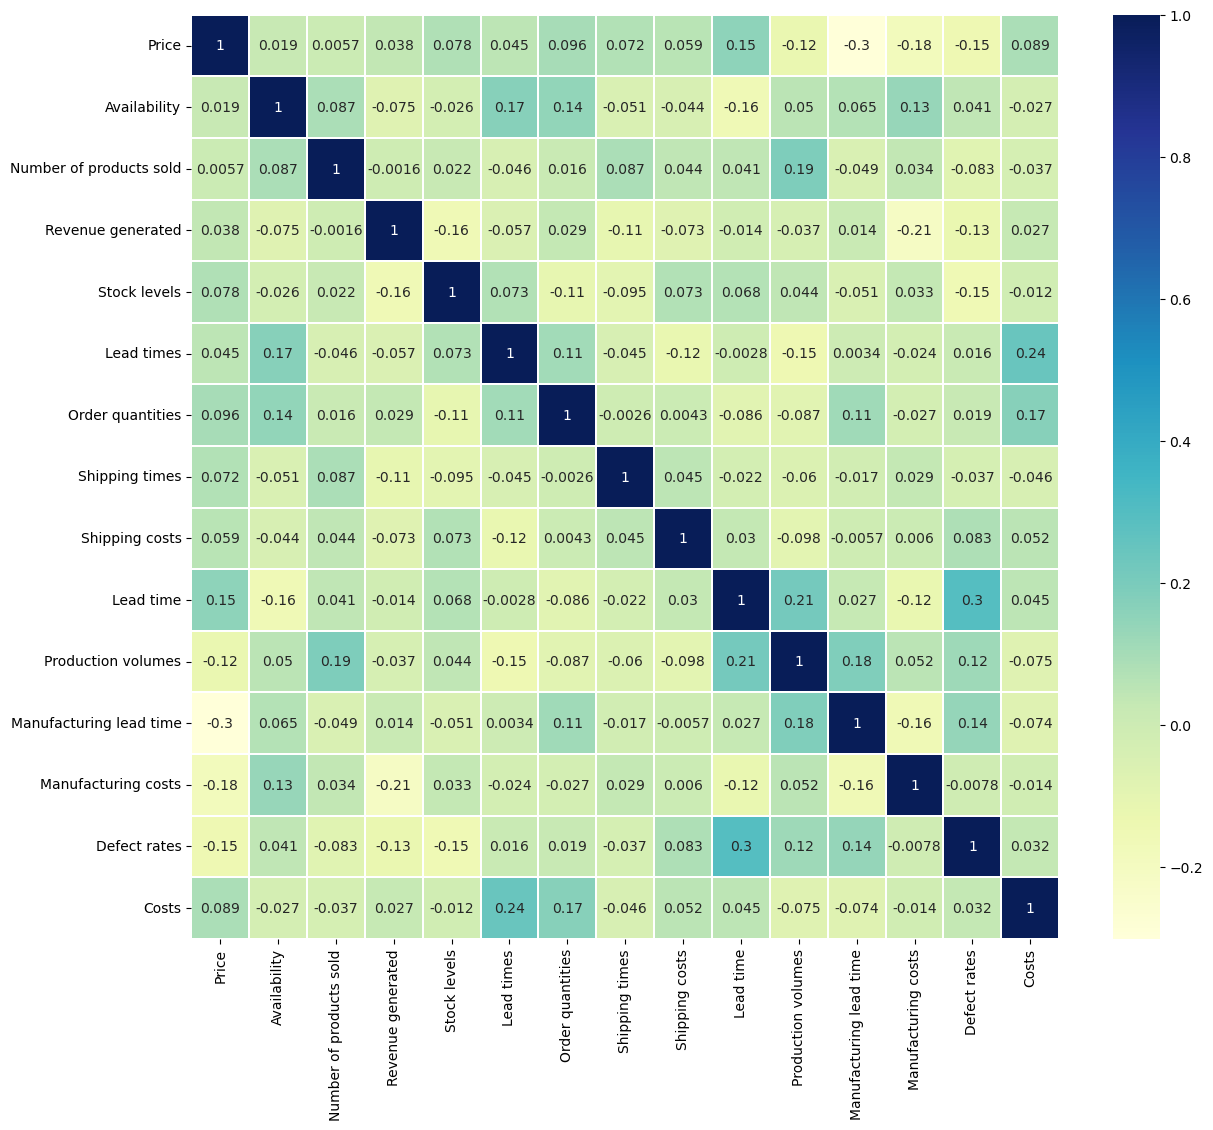

In [10]:
df_SC= df_init.copy().reset_index(drop=True)

plt.figure(figsize= (14,12))
sns.heatmap(df_SC.corr(), linewidths=0.1, cmap= 'YlGnBu', annot=True)
plt.yticks(rotation=0)

Not any significant correlation was observed. 

In [11]:
df_init['SKU'].nunique()

100

### Customer Analysis

In [12]:
df_init['Customer demographics'].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

<AxesSubplot: xlabel='Customer demographics', ylabel='count'>

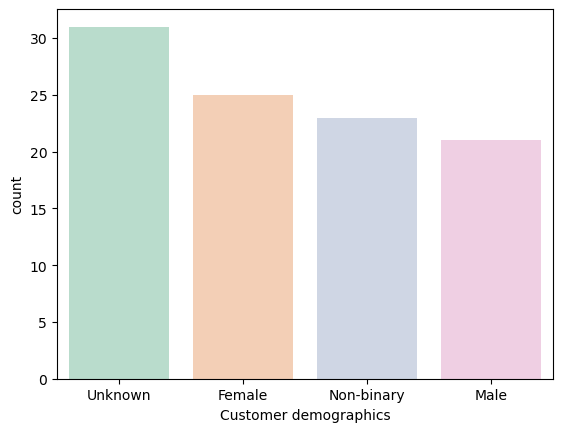

In [13]:
sns.countplot(data= df_init, x= 'Customer demographics',order= df_init['Customer demographics'].value_counts().index, palette= 'Pastel2')

In [14]:
df_init['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

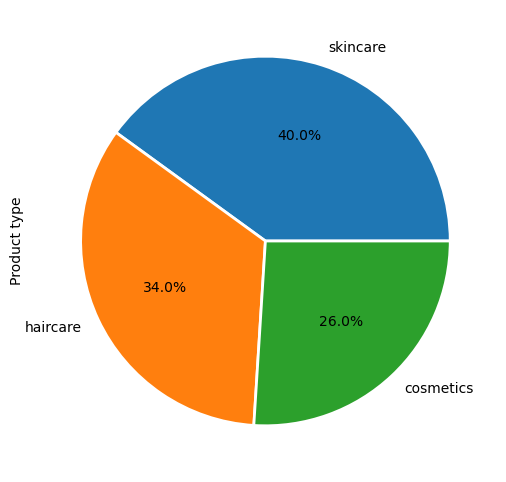

In [15]:
plt.figure(figsize=(8,6))
colors= sns.color_palette()

df_init['Product type'].value_counts().plot(kind='pie',  
        wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 2, 
                      'antialiased': True},colors=colors, autopct='%1.1f%%')
plt.show()

In [16]:
df_init.groupby(by=['Customer demographics', 'Product type'])['SKU'].count().reset_index()

,Customer demographics,Product type,SKU
0,Female,cosmetics,10
1,Female,haircare,2
2,Female,skincare,13
3,Male,cosmetics,4
4,Male,haircare,10
5,Male,skincare,7
6,Non-binary,cosmetics,5
7,Non-binary,haircare,7
8,Non-binary,skincare,11
9,Unknown,cosmetics,7


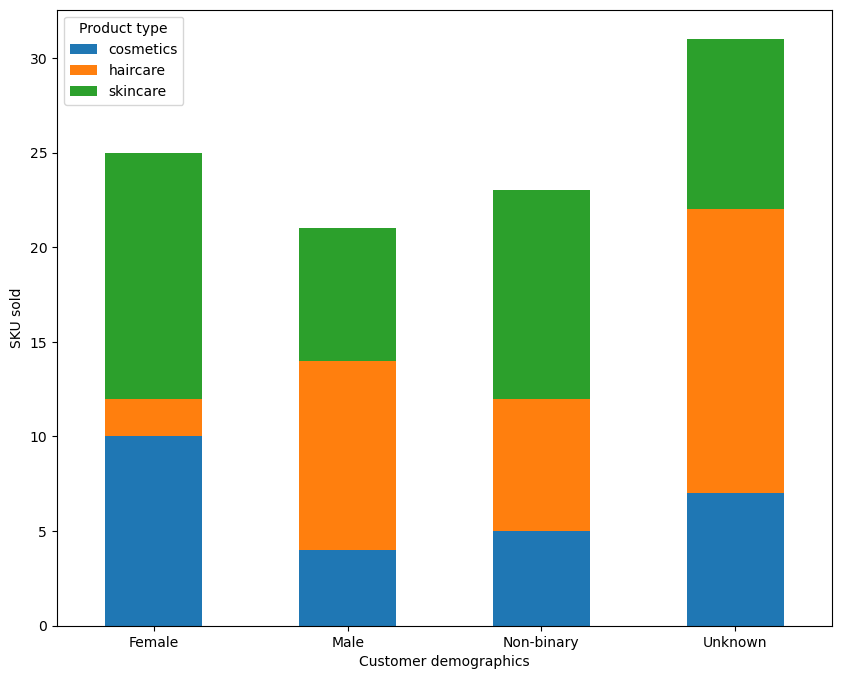

In [17]:
C1_bar= df_init.groupby(by= ['Customer demographics','Product type'])['SKU'].count().unstack().plot(kind='bar', stacked= True, figsize= (10,8), ylabel= 'SKU sold', rot=0)

In [18]:
product_grouped= df_init.groupby(by=['Product type'])['Costs', 'Revenue generated'].sum()

/var/folders/z9/t15ddpld70nc5qf41442lpr80000gn/T/ipykernel_4284/3478638107.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_grouped= df_init.groupby(by=['Product type'])['Costs', 'Revenue generated'].sum()


In [19]:
product_grouped.head()

,Costs,Revenue generated
Product type,,
cosmetics,13366.397283,161521.265999
haircare,17328.862865,174455.390605
skincare,22229.318068,241628.162133


<AxesSubplot: xlabel='Product type'>

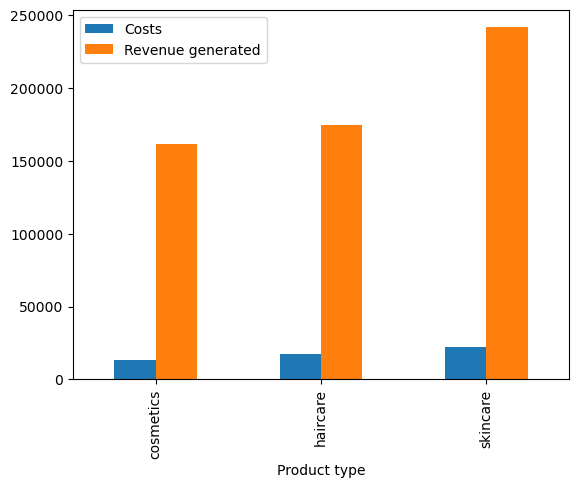

In [20]:
product_grouped.plot(kind='bar')

While costs are similar for all product types, we see that skincare products generate most revenues.

### Quality Control Analysis

[Text(0.5, 1.0, 'Defect Rates for Each Product Type')]

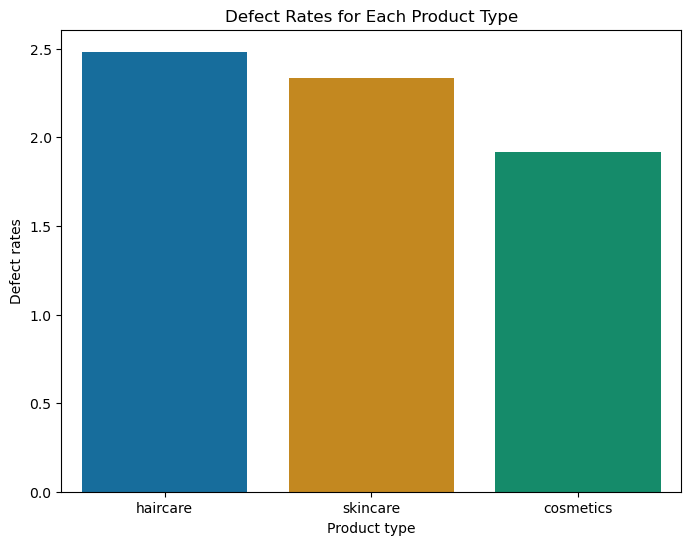

In [21]:
qc=df_init.groupby(by=['Product type'])['Defect rates'].mean().reset_index().sort_values('Defect rates', ascending=False)


plt.figure(figsize=(8,6))
sns.barplot(qc, x= 'Product type', y= 'Defect rates', palette= 'colorblind').set(title='Defect Rates for Each Product Type')

### Supply Chain Risk Analysis

Is there a high revenue generated from high risk product? In other words, are products with high supply chain risks worth the risk?
<br> For the sake of simplicity, we'll assume products have no shelf life.


In [22]:
df_risk= df_init.copy()

In [23]:
# Since the stock level varies from 0-100, the product is no longer sensitive to lead time when the stock level is at 0; 
# We will offset stock levels
df_risk['Stock levels']= 102- df_risk['Stock levels']

# While having excess stock is also not an ideal situation, for sake of simplicity, 
# we will use out-of-stock scenarios to calculate risk scores

df_risk['Risk score']= df_risk['Lead time'] *(1-df_risk.loc[:,'Stock levels'])

In [24]:
df_risk.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Risk score
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,44,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,-1247
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,49,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,-1104
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,101,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,-1200
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,79,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,-1872
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,97,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,-480


In [25]:
df_risk['Stock levels'].describe()

count    100.000000
mean      54.230000
std       31.369372
min        2.000000
25%       29.000000
50%       54.500000
75%       85.250000
max      102.000000
Name: Stock levels, dtype: float64

In [26]:
df_risk['Risk score'].describe()

count     100.000000
mean     -890.520000
std       724.945856
min     -2716.000000
25%     -1345.500000
50%      -697.000000
75%      -279.000000
max        -3.000000
Name: Risk score, dtype: float64

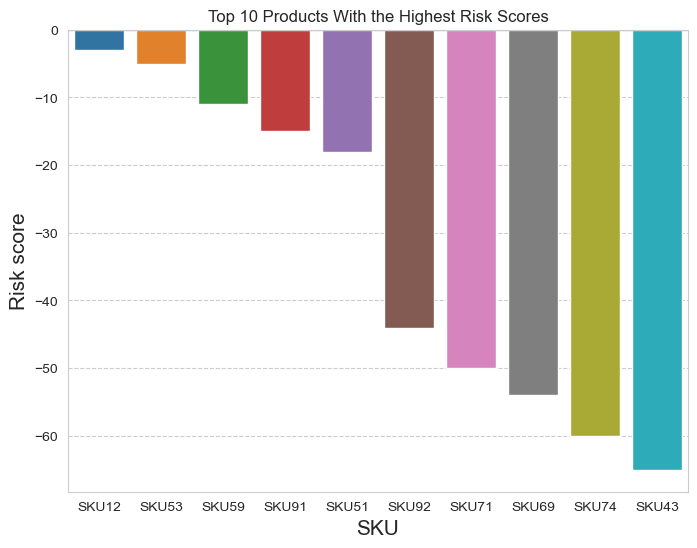

Top 10 products with highest risk scores are: SKU12, SKU53, SKU59, SKU91, SKU51, SKU92, SKU71, SKU69, SKU74, SKU43, in descending order.


In [27]:
top_10_risk= df_risk.sort_values(by= 'Risk score', ascending=False)[:10]


plt.figure(figsize=(8,6))

sns.set_style('whitegrid', {'grid.linestyle':'--'})

graph=sns.barplot(data= top_10_risk, x= 'SKU', y='Risk score')


graph.set_title('Top 10 Products With the Highest Risk Scores')
graph.set_xlabel('SKU', fontsize=15)
graph.set_ylabel('Risk score', fontsize= 15)
graph.axhline(0, color='black')

plt.show()

high_risk= top_10_risk['SKU']
print(f'Top 10 products with highest risk scores are: {", ".join(high_risk)}, in descending order.')

There is no correlation between risk and revenue generated. There is no reason to keep those products that are high risk, but do not generate significant revenues.

### Inventory Optimization Analysis

In [28]:
# While holding costs can vary, we'll assume that it is 0.2
holding_cost= 0.2

In [29]:
def calc_eoq(data):
    K= data['Costs'] 
    D= data['Number of products sold']
    H= data['Number of products sold']*holding_cost
    
    EOQ= np.sqrt((2*D*K)/H)
    
    return round(EOQ)

In [30]:
df_SC['EOQ']= calc_eoq(df_SC)

In [31]:
inventory_optimization= df_SC[['SKU', 'EOQ', 'Order quantities', 'Revenue generated']].reset_index(drop=True)

In [32]:
inventory_optimization.head(10)

,SKU,EOQ,Order quantities,Revenue generated
0,SKU0,43.0,96,8661.996792
1,SKU1,71.0,37,7460.900065
2,SKU2,38.0,88,9577.749626
3,SKU3,50.0,59,7766.836426
4,SKU4,96.0,56,2686.505152
5,SKU5,49.0,66,2828.348746
6,SKU6,37.0,58,7823.476560
7,SKU7,90.0,11,8496.103813
8,SKU8,71.0,15,7517.363211
9,SKU9,100.0,83,4971.145988


/var/folders/z9/t15ddpld70nc5qf41442lpr80000gn/T/ipykernel_4284/2169948851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  EOQ_corr= df_SC.corr()


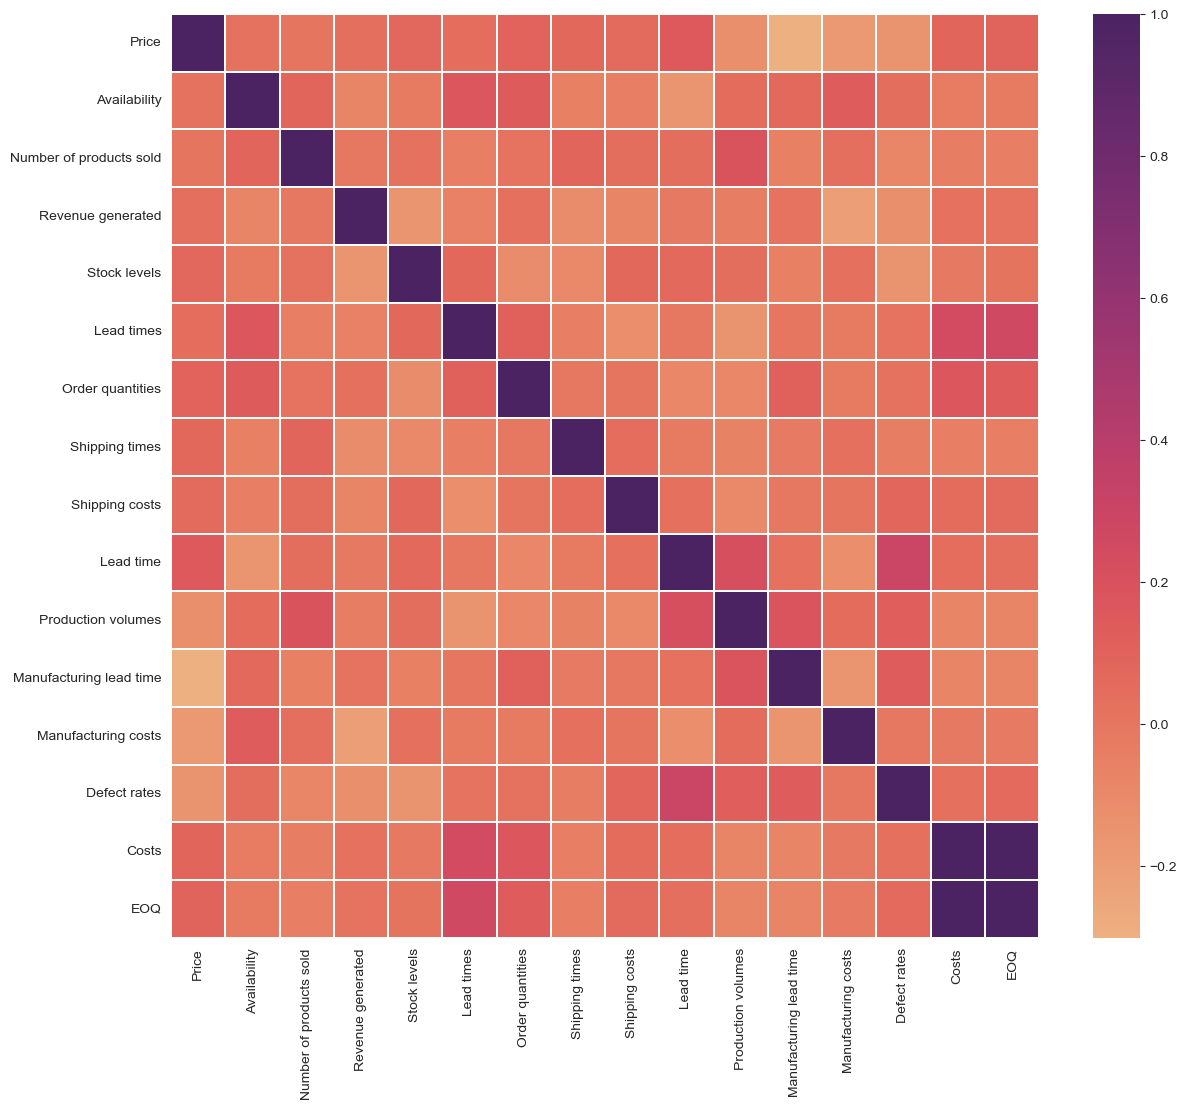

In [33]:
EOQ_corr= df_SC.corr()
EOQ_corr['EOQ'].sort_values(ascending=False).head(24)


plt.figure(figsize=(14,12))
sns.heatmap(EOQ_corr, linewidths=0.2, cmap= 'flare')
plt.show()

No correlation with revenue generated, but strong correlation with costs. It is safe to say that we can remove items with highest EOQ or minimize EOQ without impacting revenue. There is no feature that has negative correlation with EOQ.

In [34]:
EOQ_optimization= inventory_optimization.sort_values('EOQ', ascending=False).reset_index()
top_10_EOQ=list(EOQ_optimization.SKU.iloc[:10])

print(f'Top 10 products with the highest EOQ are: {", ".join(top_10_EOQ)}.')

Top 10 products with the highest EOQ are: SKU91, SKU9, SKU90, SKU76, SKU4, SKU14, SKU30, SKU87, SKU98, SKU16.


In [35]:
io_eoq= inventory_optimization.sort_values('EOQ', ascending=False)
io_eoq

,SKU,EOQ,Order quantities,Revenue generated
91,SKU91,100.0,85,1935.206794
9,SKU9,100.0,83,4971.145988
90,SKU90,100.0,96,9592.633570
76,SKU76,100.0,22,5328.375984
4,SKU4,96.0,56,2686.505152
...,...,...,...,...
15,SKU15,36.0,69,5442.086785
11,SKU11,36.0,60,6099.944116
28,SKU28,35.0,24,6117.324615
58,SKU58,33.0,44,2021.149810


In [36]:
inventory_optimization['EOQ'].describe()

count    100.000000
mean      70.240000
std       19.053948
min       32.000000
25%       56.750000
50%       72.000000
75%       87.000000
max      100.000000
Name: EOQ, dtype: float64

To create a recommendation for future improvements in reduction by focusing on products within top 75 percentile of EOQ with lowest order quantities, and that with lowest revenue generated.

In [37]:
highEOQ= np.quantile(inventory_optimization.EOQ, 0.75)
product_high_EOQ= inventory_optimization.loc[inventory_optimization['EOQ']> highEOQ]

product_high_EOQ.shape

(24, 4)

In [38]:
order_quantities= product_high_EOQ.sort_values('Order quantities').reset_index(drop=True)
low_order= order_quantities.SKU[:10]

print(f'Ten products with lowest order quantities are: {", ".join(low_order)}.')

Ten products with lowest order quantities are: SKU48, SKU7, SKU76, SKU95, SKU98, SKU30, SKU80, SKU87, SKU75, SKU4.


In [39]:
revenue_generated= product_high_EOQ.sort_values('Revenue generated').reset_index(drop=True)
low_revenue= revenue_generated.SKU[:10]

print(f'Ten products with lowest order quantities are: {", ".join(low_revenue)}.')

Ten products with lowest order quantities are: SKU75, SKU91, SKU10, SKU77, SKU4, SKU30, SKU93, SKU56, SKU9, SKU87.


In [40]:
revenue_generated[:10]

,SKU,EOQ,Order quantities,Revenue generated
0,SKU75,93.0,56,1889.073590
1,SKU91,100.0,85,1935.206794
2,SKU10,90.0,80,2330.965802
3,SKU77,92.0,57,2483.760178
4,SKU4,96.0,56,2686.505152
5,SKU30,94.0,35,2766.342367
6,SKU93,91.0,66,4531.402134
7,SKU56,91.0,83,4767.020484
8,SKU9,100.0,83,4971.145988
9,SKU87,94.0,55,5133.846701


In [41]:
revenue_generated['EOQ'][:6].describe()

count      6.000000
mean      94.166667
std        3.488075
min       90.000000
25%       92.250000
50%       93.500000
75%       95.500000
max      100.000000
Name: EOQ, dtype: float64

We see there is a significant jump in revenue generated as we go from 6th product to the 7th product, jumping from about \\$2766.34 to \\$4531.40. These products also have high EOQ, with minimum of 90 and maximum of 100. Such high EOQ and low revenue signals potential room for improvements in revenues. Let's evaluate their risk scores.

In [42]:
hi_EOQ_low_rev_products= revenue_generated['SKU'][:6]
high_EOQ_low_revenue= df_risk.loc[df_risk['SKU'].isin(hi_EOQ_low_rev_products)]

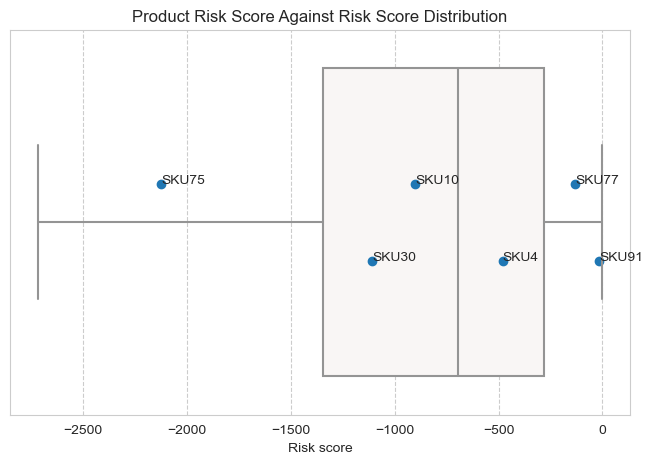

In [43]:
plt.figure(figsize=(8, 5))
plt.title('Product Risk Score Against Risk Score Distribution')
ax = sns.boxplot(data=df_risk, x= 'Risk score', palette='vlag')
y = [-0.1, 0.1, -0.1, 0.1, -0.1, 0.1]
z = high_EOQ_low_revenue.sort_values('Risk score')['Risk score'].values
n = high_EOQ_low_revenue.sort_values('Risk score')['SKU'].values
ax.scatter(z, y)
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
plt.show()

SKU91's risk score is significantly higher than the upper quartile. Given its comparatively higher risk, higher economic order quantity (EOQ), and low revenue, **SKU91** should be the first to be considered for discontinuation, followed by **SKU77**. 

Let's examine defect rates for SKU 91 and SKU77.

Let's examine SKU91's defect rate.

In [44]:
df_risk['Defect rates'].describe()

count    100.000000
mean       2.277158
std        1.461366
min        0.018608
25%        1.009650
50%        2.141863
75%        3.563995
max        4.939255
Name: Defect rates, dtype: float64

In [45]:
# since the defect rate ranges from 0.018 to 4.93, let's scale it.
df_risk['Normalized_defect']= minmax_scale(df_risk['Defect rates'])

In [46]:
df_risk.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Risk score,Normalized_defect
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,44,7,96,...,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,-1247,0.042231
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,49,30,37,...,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,-1104,0.982688
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,101,10,88,...,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,-1200,0.927111
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,79,13,59,...,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,-1872,0.960857
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,97,3,56,...,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,-480,0.635480


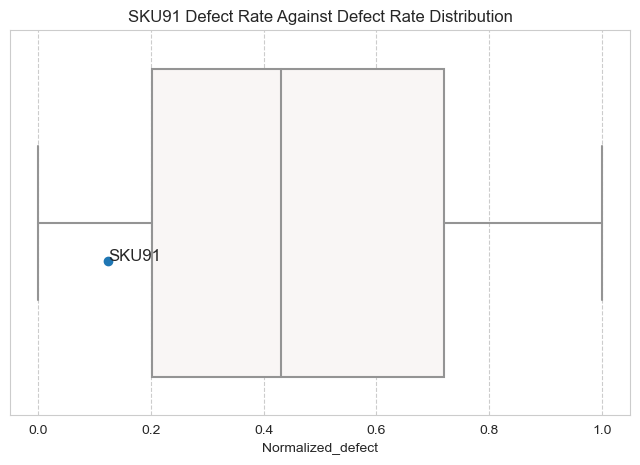

In [47]:
plt.figure(figsize=(8, 5))
plt.title('SKU91 Defect Rate Against Defect Rate Distribution')
ax = sns.boxplot(data=df_risk, x= 'Normalized_defect', palette='vlag')

ax.scatter(df_risk['Normalized_defect'][df_risk['SKU']=='SKU91'], 0.1)
ax.annotate('SKU91', (df_risk['Normalized_defect'][df_risk['SKU']=='SKU91'], 0.1), fontsize=12)

plt.show()

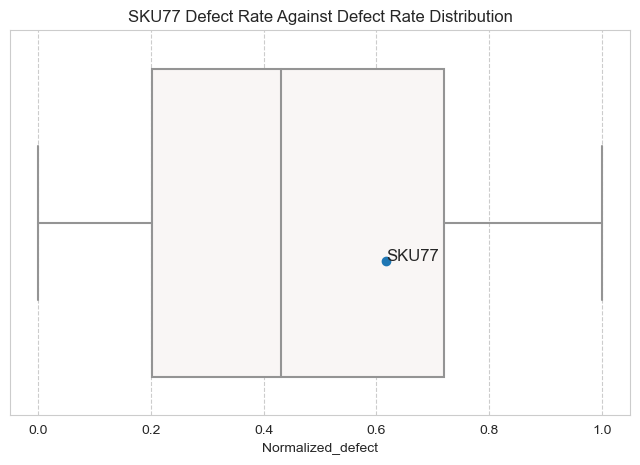

In [48]:
plt.figure(figsize=(8, 5))
plt.title('SKU77 Defect Rate Against Defect Rate Distribution')
ax = sns.boxplot(data=df_risk, x= 'Normalized_defect', palette='vlag')

ax.scatter(df_risk['Normalized_defect'][df_risk['SKU']=='SKU77'], 0.1)
ax.annotate('SKU77', (df_risk['Normalized_defect'][df_risk['SKU']=='SKU77'], 0.1), fontsize=12)

plt.show()

While revenue generated by SKU77 is double that of SKU91, SKU77's defect rate is significantly higher. Furthermore, SKU77 has significantly lower order quantity than SKU91, with SKU77 being 57 and SKU91 85.

### Route Analysis

In [49]:
routes= df_init.groupby('Routes').sum()

/var/folders/z9/t15ddpld70nc5qf41442lpr80000gn/T/ipykernel_4284/3523109777.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  routes= df_init.groupby('Routes').sum()


In [50]:
routes.head()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
Routes,,,,,,,,,,,,,,,
Route A,1842.069155,1972,19778,253198.852380,1932,632,1844,259,231.327064,705,24250,661,2181.916095,100.697189,20875.774494
Route B,2047.872116,1968,18370,204484.007893,1996,637,2066,211,205.423475,672,20039,500,1716.735448,85.920118,22039.384026
Route C,1056.304864,900,7951,119921.958465,849,327,1012,105,118.064369,331,12495,316,828.017782,41.098492,10009.419696


<AxesSubplot: title={'center': 'Price'}, xlabel='Routes'>

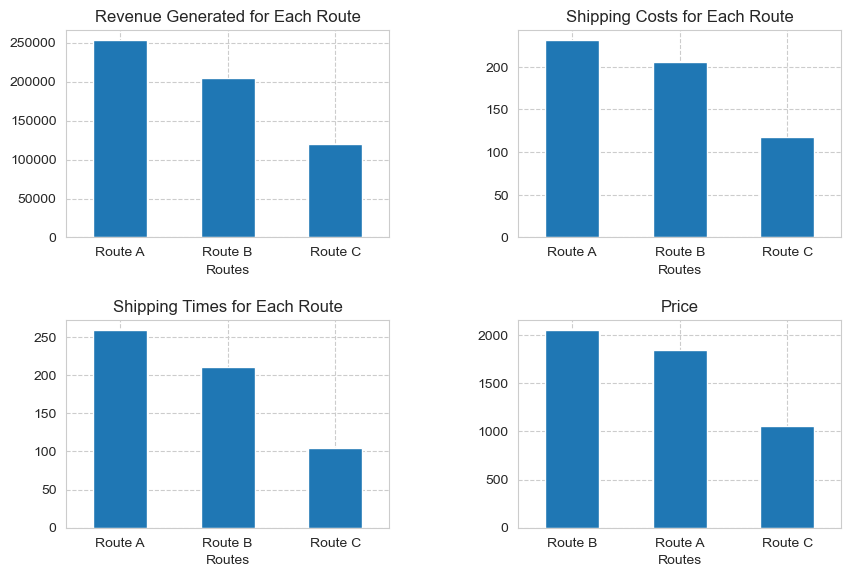

In [51]:
plt.figure(figsize=(16, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)


plt.subplot(4,2,1)
routes['Revenue generated'].sort_values(ascending=False).plot.bar(figsize= (10,14), title= 'Revenue Generated for Each Route', rot=0)

plt.subplot(4,2,2)
routes['Shipping costs'].sort_values(ascending=False).plot.bar(figsize= (10,14), title= 'Shipping Costs for Each Route', rot=0)


plt.subplot(4,2,3)
routes['Shipping times'].sort_values(ascending=False).plot.bar(figsize= (10,14), title= 'Shipping Times for Each Route', rot=0)

plt.subplot(4,2,4)
routes['Price'].sort_values(ascending=False).plot.bar(figsize= (10,14), title= 'Price', rot=0)

While Route A generates most revenue, we also see that it is the most expensive route of all. Let's see how much of total transportation utilizes Route A.

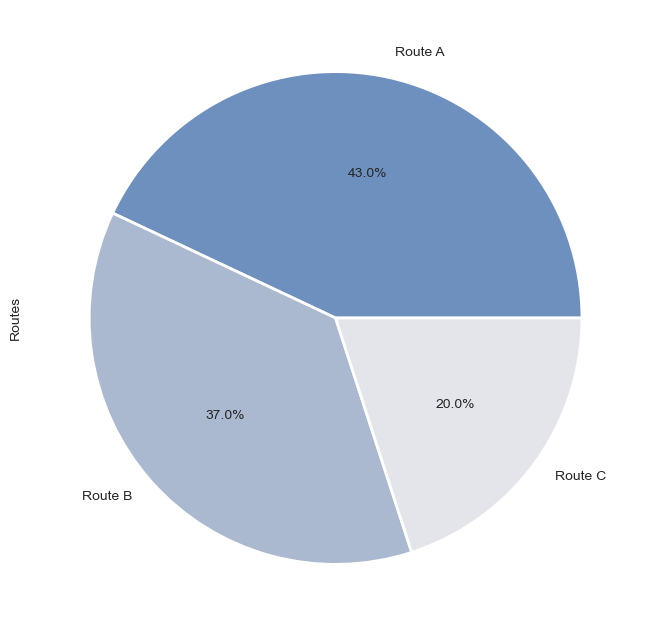

In [52]:
plt.figure(figsize=(10,8))

color_map= sns.color_palette('vlag')
keys= list(np.unique(df_init['Routes']))

df_init['Routes'].value_counts().plot(kind='pie', wedgeprops= {"edgecolor":'white', 'linewidth':2, 'antialiased':True},
        colors= color_map, autopct= '%1.1f%%')

plt.show()

Given the proportion of Route A, it makes sense that the Route A has the highest shipping time and shipping costs.

Out of curiosity, let's see which shipping route our previously mentioned **SKU 91** uses.

In [53]:
df_risk[df_risk['SKU']=='SKU91']['Routes']

91    Route B
Name: Routes, dtype: object

Let's evaluate modes of transportation in each route.

In [54]:
Route_Transport= df_init.groupby(by=['Routes', 'Transportation modes'])['SKU'].count()

In [55]:
Route_Transport.reset_index()

,Routes,Transportation modes,SKU
0,Route A,Air,11
1,Route A,Rail,14
2,Route A,Road,11
3,Route A,Sea,7
4,Route B,Air,7
5,Route B,Rail,11
6,Route B,Road,13
7,Route B,Sea,6
8,Route C,Air,8
9,Route C,Rail,3


<Figure size 1200x1000 with 0 Axes>

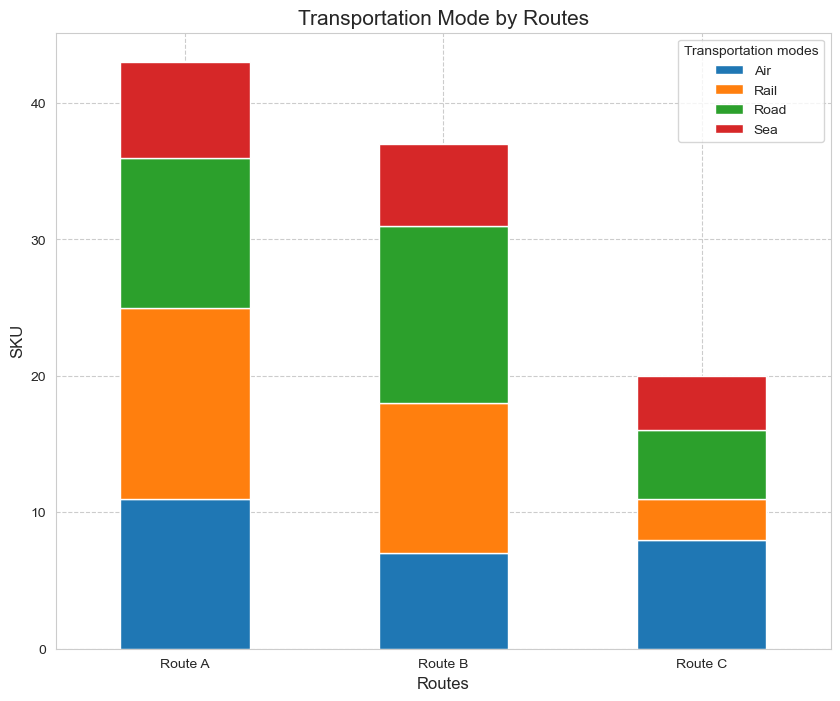

In [56]:
plt.figure(figsize=(12, 10))

RT_bar= Route_Transport.unstack().plot(kind='bar', stacked= True, figsize= (10,8), ylabel= 'SKU', rot=0)

plt.title('Transportation Mode by Routes', fontsize=15)
plt.xlabel('Routes', fontsize=12)
plt.ylabel('SKU', fontsize=12)
plt.show()

## Modeling
<br> According to McKinsey, ML-based approach to supply chain prediction can reduce mistakes by 50%.We will try to predict stock levels, transportation costs, and routes.

### Stock Level Prediction

In [57]:
reg_data= df_init.copy().select_dtypes(exclude='object')

In [58]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    100 non-null    float64
 1   Availability             100 non-null    int64  
 2   Number of products sold  100 non-null    int64  
 3   Revenue generated        100 non-null    float64
 4   Stock levels             100 non-null    int64  
 5   Lead times               100 non-null    int64  
 6   Order quantities         100 non-null    int64  
 7   Shipping times           100 non-null    int64  
 8   Shipping costs           100 non-null    float64
 9   Lead time                100 non-null    int64  
 10  Production volumes       100 non-null    int64  
 11  Manufacturing lead time  100 non-null    int64  
 12  Manufacturing costs      100 non-null    float64
 13  Defect rates             100 non-null    float64
 14  Costs                    10

In [59]:
all_features= list(reg_data.columns)
stock_features= all_features.copy()
stock_features.remove('Stock levels')

In [60]:
X= reg_data[stock_features]
y= reg_data['Stock levels']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state= 42)

In [61]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [62]:
model= LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [63]:
y_pred= model.predict(X_test_scaled)
r2= r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

R-squared: 0.07279640552351907


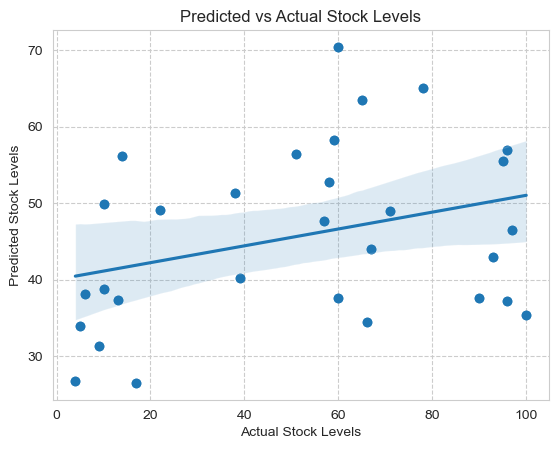

In [64]:
plt.scatter(y_test, y_pred)

sns.regplot(x=y_test, y= y_pred)

plt.xlabel('Actual Stock Levels')
plt.ylabel('Predicted Stock Levels')
plt.title('Predicted vs Actual Stock Levels')

plt.show()

### Transportation Cost Prediction

In [65]:
all_features= list(reg_data.columns)
TCost_features= all_features.copy()
TCost_features.remove('Shipping costs')

In [66]:
X= reg_data[TCost_features]
y= reg_data['Shipping costs']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state= 42)

In [67]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [68]:
model= LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
ols_model = sm.OLS(reg_data['Shipping costs'], X)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Shipping costs   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              26.90
Date:                Fri, 12 Jan 2024   Prob (F-statistic):                    1.59e-25
Time:                        18:03:48   Log-Likelihood:                         -239.30
No. Observations:                 100   AIC:                                      506.6
Df Residuals:                      86   BIC:                                      543.1
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Price                       0.0134      0.010      1.333      0.186      -0.007       0.033
Availability                0.0012      0.010      0.118      0.906      -0.019       0.021
Number of products sold     0.0010      0.001      1.043      0.300      -0.001       0.003
Revenue generated        8.511e-05   9.71e-05      0.876      0.383      -0.000       0.000
Stock levels                0.0162      0.009      1.773      0.080      -0.002       0.034
Lead times                 -0.0326      0.034     -0.954      0.343      -0.101       0.035
Order quantities            0.0044      0.011      0.392      0.696      -0.018       0.027
Shipping times              0.1344      0.100      1.342      0.183      -0.065       0.333
Lead time                   0.0111      0.037      0.303      0.763      -0.062       0.084
Production volumes         -0.0008      0.001     -0.673      0.503      -0.003       0.002
Manufacturing lead time     0.0402      0.035      1.159      0.250      -0.029       0.109
Manufacturing costs         0.0122      0.010      1.226      0.223      -0.008       0.032
Defect rates                0.3586      0.212      1.689      0.095      -0.063       0.781
Costs                       0.0015      0.001      1.303      0.196      -0.001       0.004
==============================================================================
Omnibus:                        6.435   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                3.008
Skew:                           0.127   Prob(JB):                        0.222
Kurtosis:                       2.189   Cond. No.                     4.80e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

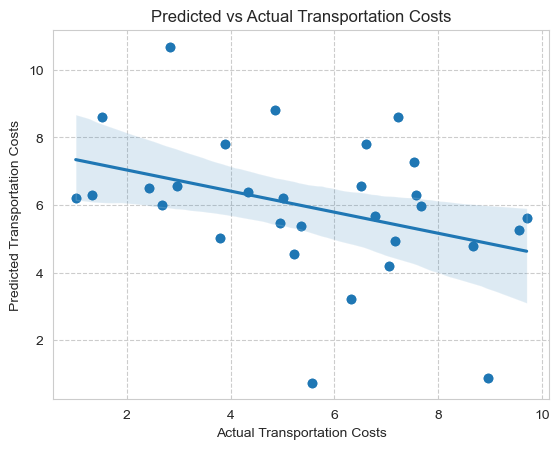

In [70]:
plt.scatter(y_test, y_pred)

sns.regplot(x=y_test, y= y_pred)

plt.xlabel('Actual Transportation Costs')
plt.ylabel('Predicted Transportation Costs')
plt.title('Predicted vs Actual Transportation Costs')

plt.show()

### Cost Optimization

In [71]:
X= df_init.loc[:, 'Production volumes'].values.reshape(-1,1)
y= df_init.loc[:, 'Manufacturing costs'].values

In [72]:
n_folds= 5

mse_scores=[]
rmse_scores=[]
mae_scores=[]
r2_scores=[]

In [73]:
scaler= MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [74]:
lowest_cost= float('inf')
optimal_vol= None

In [75]:
kf= KFold(n_splits=n_folds, shuffle= True, random_state= 17)

In [76]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    model = tf.keras.Sequential([
        Dense(64, activation='relu', input_dim=1),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model_checkpoint = ModelCheckpoint('/Users/josephlim/Desktop/Data Science/Supply Chain/Fashion and Beauty/Data', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min')

    history = model.fit(X_train_scaled,
                        y_train, epochs=100,
                        batch_size=32,
                        validation_data=(X_test_scaled, y_test),
                        callbacks=[early_stopping, model_checkpoint])

    model.load_weights('/Users/josephlim/Desktop/Data Science/Supply Chain/Fashion and Beauty/Data')
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test - y_pred))
    r2 = r2_score(y_test, y_pred)

    target_range = np.max(y_test) - np.min(y_test)
    percentage_mse = (mse / target_range) * 100
    percentage_rmse = (rmse / target_range) * 100
    percentage_mae = (mae / target_range) * 100
    percentage_r2 = (r2 * 100)

    mse_scores.append(percentage_mse)
    rmse_scores.append(percentage_rmse)
    mae_scores.append(percentage_mae)
    r2_scores.append(percentage_r2)

Epoch 1/100
3/3 [==============================] - 1s 106ms/step - loss: 3111.5625 - val_loss: 2918.4375
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 3106.7493 - val_loss: 2913.3789
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 3101.8853 - val_loss: 2908.3647
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 3097.2969 - val_loss: 2903.6011
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 3092.8589 - val_loss: 2898.7559
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 3088.1230 - val_loss: 2893.6802
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 3083.0950 - val_loss: 2888.4060
Epoch 8/100
3/3 [==============================] - 0s 28ms/step - loss: 3077.7939 - val_loss: 2882.8843
Epoch 9/100
3/3 [==============================] - 0s 44ms/step - loss: 3072.6809 - val_loss: 2877.0645
Epoch 10/100
3/3 [==============================] - 0s 28ms/ste

3/3 [==============================] - 0s 25ms/step - loss: 1025.7805 - val_loss: 844.2567
Epoch 80/100
3/3 [==============================] - 0s 25ms/step - loss: 1013.7617 - val_loss: 834.5955
Epoch 81/100
3/3 [==============================] - 0s 26ms/step - loss: 999.0043 - val_loss: 826.7751
Epoch 82/100
3/3 [==============================] - 0s 26ms/step - loss: 990.8749 - val_loss: 820.0075
Epoch 83/100
3/3 [==============================] - 0s 23ms/step - loss: 980.5082 - val_loss: 814.8939
Epoch 84/100
3/3 [==============================] - 0s 23ms/step - loss: 971.0685 - val_loss: 811.0106
Epoch 85/100
3/3 [==============================] - 0s 23ms/step - loss: 965.7098 - val_loss: 807.9047
Epoch 86/100
3/3 [==============================] - 0s 23ms/step - loss: 960.4412 - val_loss: 805.6595
Epoch 87/100
3/3 [==============================] - 0s 25ms/step - loss: 955.4043 - val_loss: 804.1424
Epoch 88/100
3/3 [==============================] - 0s 26ms/step - loss: 952.6938 - 

3/3 [==============================] - 0s 21ms/step - loss: 2143.9653 - val_loss: 1367.4701
Epoch 58/100
3/3 [==============================] - 0s 21ms/step - loss: 2100.7791 - val_loss: 1328.9594
Epoch 59/100
3/3 [==============================] - 0s 22ms/step - loss: 2056.5251 - val_loss: 1290.9470
Epoch 60/100
3/3 [==============================] - 0s 21ms/step - loss: 2015.8181 - val_loss: 1252.7805
Epoch 61/100
3/3 [==============================] - 0s 21ms/step - loss: 1971.2643 - val_loss: 1215.1840
Epoch 62/100
3/3 [==============================] - 0s 23ms/step - loss: 1928.4346 - val_loss: 1177.3418
Epoch 63/100
3/3 [==============================] - 0s 21ms/step - loss: 1889.2441 - val_loss: 1139.1594
Epoch 64/100
3/3 [==============================] - 0s 20ms/step - loss: 1843.2805 - val_loss: 1102.3953
Epoch 65/100
3/3 [==============================] - 0s 22ms/step - loss: 1805.3929 - val_loss: 1065.3074
Epoch 66/100
3/3 [==============================] - 0s 21ms/step - l

3/3 [==============================] - 0s 21ms/step - loss: 2811.5566 - val_loss: 2366.3511
Epoch 36/100
3/3 [==============================] - 0s 21ms/step - loss: 2790.3313 - val_loss: 2347.7122
Epoch 37/100
3/3 [==============================] - 0s 22ms/step - loss: 2767.4895 - val_loss: 2328.3093
Epoch 38/100
3/3 [==============================] - 0s 22ms/step - loss: 2744.2832 - val_loss: 2308.0732
Epoch 39/100
3/3 [==============================] - 0s 21ms/step - loss: 2718.6389 - val_loss: 2287.1750
Epoch 40/100
3/3 [==============================] - 0s 21ms/step - loss: 2693.7874 - val_loss: 2265.2732
Epoch 41/100
3/3 [==============================] - 0s 21ms/step - loss: 2666.7488 - val_loss: 2242.7554
Epoch 42/100
3/3 [==============================] - 0s 21ms/step - loss: 2639.5149 - val_loss: 2219.3975
Epoch 43/100
3/3 [==============================] - 0s 21ms/step - loss: 2610.0005 - val_loss: 2195.4009
Epoch 44/100
3/3 [==============================] - 0s 20ms/step - l

Epoch 13/100
3/3 [==============================] - 0s 22ms/step - loss: 2862.1794 - val_loss: 3587.8933
Epoch 14/100
3/3 [==============================] - 0s 21ms/step - loss: 2854.6611 - val_loss: 3580.2378
Epoch 15/100
3/3 [==============================] - 0s 21ms/step - loss: 2846.6843 - val_loss: 3571.9539
Epoch 16/100
3/3 [==============================] - 0s 21ms/step - loss: 2838.3726 - val_loss: 3562.9968
Epoch 17/100
3/3 [==============================] - 0s 21ms/step - loss: 2829.2261 - val_loss: 3553.4102
Epoch 18/100
3/3 [==============================] - 0s 23ms/step - loss: 2819.0234 - val_loss: 3543.1934
Epoch 19/100
3/3 [==============================] - 0s 21ms/step - loss: 2808.8569 - val_loss: 3532.1938
Epoch 20/100
3/3 [==============================] - 0s 20ms/step - loss: 2797.7891 - val_loss: 3520.4165
Epoch 21/100
3/3 [==============================] - 0s 22ms/step - loss: 2785.1685 - val_loss: 3507.9578
Epoch 22/100
3/3 [==============================] - 0s 

3/3 [==============================] - 0s 21ms/step - loss: 846.8324 - val_loss: 1221.7743
Epoch 92/100
3/3 [==============================] - 0s 21ms/step - loss: 846.4162 - val_loss: 1216.3517
Epoch 93/100
3/3 [==============================] - 0s 23ms/step - loss: 845.2073 - val_loss: 1211.4917
Epoch 94/100
3/3 [==============================] - 0s 21ms/step - loss: 845.2960 - val_loss: 1206.4373
Epoch 95/100
3/3 [==============================] - 0s 20ms/step - loss: 844.2985 - val_loss: 1202.0105
Epoch 96/100
3/3 [==============================] - 0s 21ms/step - loss: 843.4215 - val_loss: 1198.2626
Epoch 97/100
3/3 [==============================] - 0s 21ms/step - loss: 843.6920 - val_loss: 1194.5221
Epoch 98/100
3/3 [==============================] - 0s 21ms/step - loss: 842.9620 - val_loss: 1191.8473
Epoch 99/100
3/3 [==============================] - 0s 21ms/step - loss: 842.6841 - val_loss: 1189.5386
Epoch 100/100
1/1 [==============================] - 0s 48ms/step
Epoch 1/100

Epoch 69/100
3/3 [==============================] - 0s 21ms/step - loss: 1413.2126 - val_loss: 1853.3383
Epoch 70/100
3/3 [==============================] - 0s 23ms/step - loss: 1375.8381 - val_loss: 1807.8184
Epoch 71/100
3/3 [==============================] - 0s 24ms/step - loss: 1335.4044 - val_loss: 1764.2340
Epoch 72/100
3/3 [==============================] - 0s 22ms/step - loss: 1302.0624 - val_loss: 1720.4254
Epoch 73/100
3/3 [==============================] - 0s 22ms/step - loss: 1266.8259 - val_loss: 1678.1960
Epoch 74/100
3/3 [==============================] - 0s 21ms/step - loss: 1231.6484 - val_loss: 1637.8545
Epoch 75/100
3/3 [==============================] - 0s 21ms/step - loss: 1199.2048 - val_loss: 1598.6071
Epoch 76/100
3/3 [==============================] - 0s 21ms/step - loss: 1167.2539 - val_loss: 1561.2507
Epoch 77/100
3/3 [==============================] - 0s 23ms/step - loss: 1138.4276 - val_loss: 1525.7828
Epoch 78/100
3/3 [==============================] - 0s 

In [77]:
avg_mse= np.mean(mse_scores)
avg_mae= np.mean(mae_scores)
avg_rmse= np.mean(rmse_scores)
avg_r2= np.mean(r2_scores)

print(f'The average mean squared error is: {avg_mse:.2f}%')
print(f'The average mean absolute error is: {avg_mae: .2f}%')
print(f'The average root mean squared error is: {avg_rmse: .2f}%')
print(f'The average r2 score is: {avg_r2: .2f}%')

The average mean squared error is: 987.10%
The average mean absolute error is:  27.97%
The average root mean squared error is:  32.49%
The average r2 score is: -11.47%


In [78]:
min_prod_vol= df_init['Production volumes'].min()
max_prod_vol= df_init['Production volumes'].max()
step_size=100

In [79]:
lowest_cost= float('inf')
best_prod_vol= None

for prod_vol in range(min_prod_vol, max_prod_vol+1, step_size):
    normalized_prod_vol= scaler.transform(np.array([[prod_vol]]))
    pred_cost= model.predict(normalized_prod_vol)
    
    if pred_cost[0][0]< lowest_cost:
        lowest_cost= pred_cost[0][0]
        best_prod_vol= prod_vol
    
print('Most optimal production volume to minimize manufacturing cost:', best_prod_vol)
print('The cheapest manufacturing cost:', lowest_cost)

1/1 [==============================] - 0s 18ms/step
Most optimal production volume to minimize manufacturing cost: 104
The cheapest manufacturing cost: 25.94667
